In [15]:
import pandas as pd
import fipt

ModuleNotFoundError: No module named 'fipt'

In [10]:
from pathlib import Path


In [12]:
p = Path('.')

In [6]:
import logging
logging.basicConfig(level=logging.INFO)

In [7]:
fn = '../tests/test_data_001.csv'

df = pd.read_csv(fn)
df.head()

,Frequency (Hz),Z' (Ohms),"Z"" (Ohms)"
0,300000.0,11.1089,1.555010
1,238298.0,11.1432,1.394260
2,189287.0,11.1805,1.218730
3,150356.0,11.2241,1.044200
4,119432.0,11.2579,0.879109


In [8]:
ipdata =  fipt.ImpedanceData(fn, fn, 
                       w_data = df['Frequency (Hz)'].values,  
                       z_real_data = df['Z\' (Ohms)'].values, 
                       z_imag_data = df['Z\" (Ohms)'].values)

NameError: name 'fipt' is not defined

In [5]:
symimfit = fipt.SymmetricImpedanceFitter(impedance_data=ipdata)        
symimfit.sanitize_data()
# symimfit.plot_fit(data_only=True);

# restrict data range
symimfit.set_min_w(None)
symimfit.set_max_z_abs(400)

# use student t likelihood function
symimfit.configure_likelihood(likelihood_config=dict(name='t', scale=1, df=1))

# guess start parameters
start_params = symimfit.guess(make_plots=False)
start_params

INFO:fipt:Removing data points with -Im(Z)<0
INFO:fipt.helpers:z_angle_max_i: 37
INFO:fipt.helpers:w_trans: 4.754680


Parameters([('r_sep', <Parameter 'r_sep', 10.677487637409639, bounds=[2:inf]>),
            ('r_ion', <Parameter 'r_ion', 69.94206087779864, bounds=[10:inf]>),
            ('gamma',
             <Parameter 'gamma', 0.8573640263649002, bounds=[0.5:1.3]>),
            ('q_s', <Parameter 'q_s', 0.018, bounds=[-inf:inf]>)])

In [6]:
# manual configuration of parameters
start_params_1 = start_params
# start_params_1['gamma'].set(value=0.916)
# start_params_1['r_ion'].set(value=50)
# start_params_1['q_s'].set(value=0.004)

# symimfit.plot_fit(params=start_params_1);        
#         symimfit.set_max_z_abs(250)

In [7]:
result = symimfit.fit()        

print(fipt.lmfit.fit_report(result, show_correl=False))

[[Fit Statistics]]
    # function evals   = 314
    # data points      = 53
    # variables        = 4
    chi-square         = 103.040
    reduced chi-square = 2.103
    Akaike info crit   = 43.236
    Bayesian info crit = 51.117
[[Variables]]
    r_sep:   10.6428499 +/- 0.754047 (7.09%) (init= 10.67749)
    r_ion:   79.0201412 +/- 7.535995 (9.54%) (init= 69.94206)
    gamma:   0.90655453 +/- 0.018385 (2.03%) (init= 0.857364)
    q_s:     0.01637876 +/- 0.000194 (1.18%) (init= 0.018)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


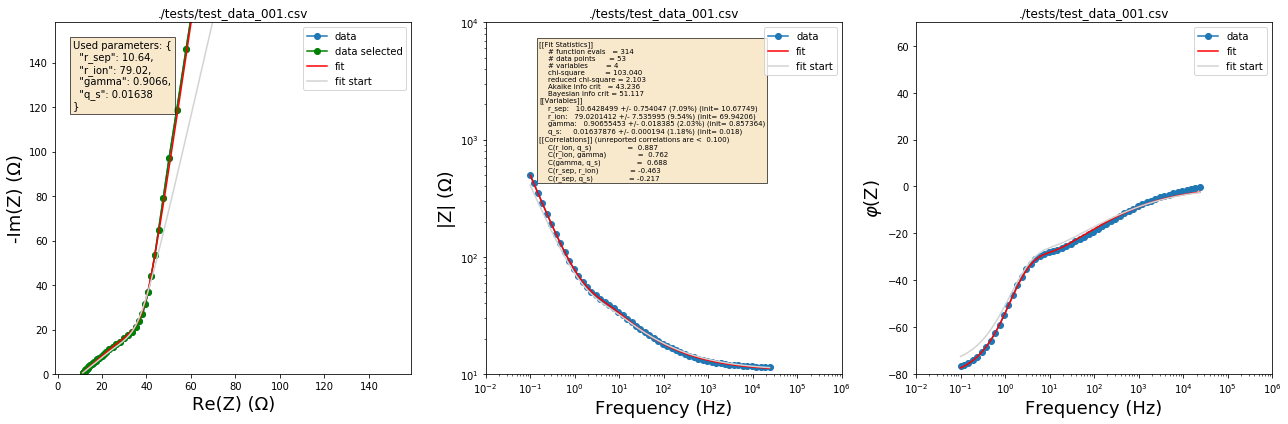

In [8]:
f, ax = symimfit.plot_fit(start_params = start_params_1);
f.show()

In [11]:
symimfit.save_results(export_folder='./demo_results')

INFO:fipt:Using base file name: ./tests/test_data_001.csv
INFO:fipt:Using export folder: demo_results


Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
gamma    0.9066      0.5      1.3  0.01839     True     None     None
q_s     0.01638     -inf      inf 0.000194     True     None     None
r_ion     79.02       10      inf    7.536     True     None     None
r_sep     10.64        2      inf    0.754     True     None     None


('demo_results\\test_data_001.csv.fit.raw_data.hdf',
 'demo_results\\test_data_001.csv.fit.report.txt',
 'demo_results\\test_data_001.csv.fit.result_full.json',
 'demo_results\\test_data_001.csv.fit.result_params.json',
 'demo_results\\test_data_001.csv.fit.result_simple.json',
 'demo_results\\test_data_001.csv.fit.plot.png')